In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import missingno as msno
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,\
                            ConfusionMatrixDisplay, roc_curve, auc

In [2]:
df = pd.read_excel('dados/recrutamento.xlsx')

In [3]:
df.shape

(215, 15)

In [4]:
df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p status    salary  
0   Sci&Tech     No     55.0         Mkt&HR  58.80    Yes  270000.0  
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28    Yes  200000.0  
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80    Yes  250000.0  
3   Sci&Tech     No     66.0         Mkt&HR  59.43     No       NaN  
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50    Yes  425000.0

In [5]:
df['status'].unique()

array(['Yes', 'No'], dtype=object)

In [6]:
df.describe()

sl_no       ssc_p       hsc_p    degree_p     etest_p       mba_p  \
count  215.000000  215.000000  215.000000  215.000000  215.000000  215.000000   
mean   108.000000   67.303395   66.333163   66.370186   72.100558   62.278186   
std     62.209324   10.827205   10.897509    7.358743   13.275956    5.833385   
min      1.000000   40.890000   37.000000   50.000000   50.000000   51.210000   
25%     54.500000   60.600000   60.900000   61.000000   60.000000   57.945000   
50%    108.000000   67.000000   65.000000   66.000000   71.000000   62.000000   
75%    161.500000   75.700000   73.000000   72.000000   83.500000   66.255000   
max    215.000000   89.400000   97.700000   91.000000   98.000000   77.890000   

              salary  
count     148.000000  
mean   288655.405405  
std     93457.452420  
min    200000.000000  
25%    240000.000000  
50%    265000.000000  
75%    300000.000000  
max    940000.000000

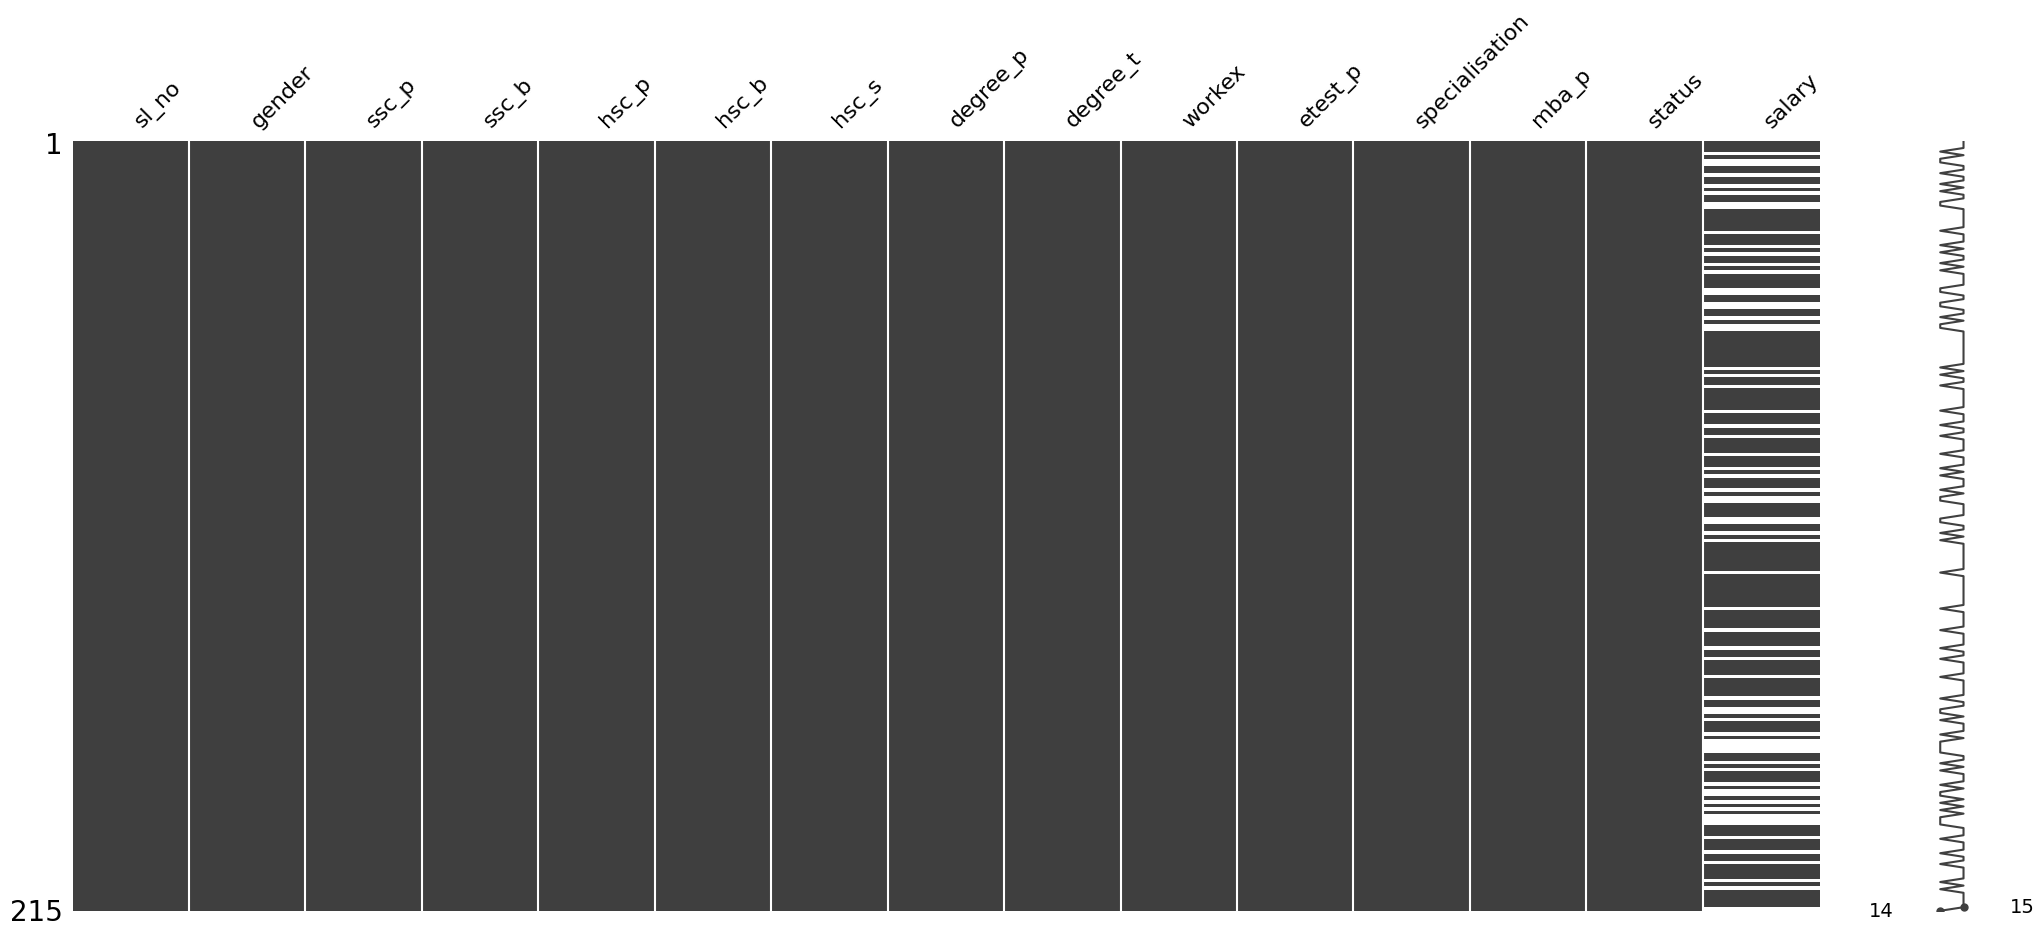

In [7]:
msno.matrix(df)
plt.show()

In [8]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

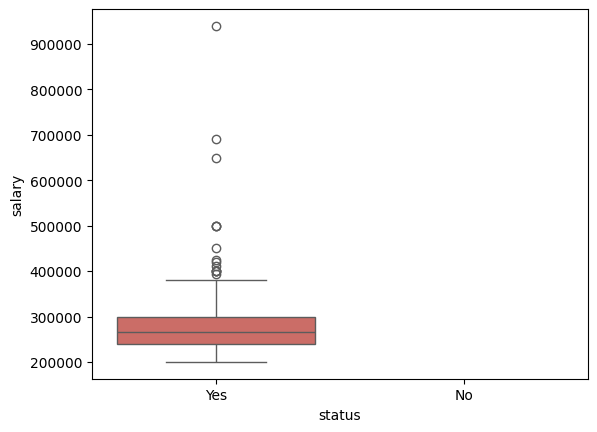

In [9]:
sns.boxplot(x='status', y='salary', data=df, palette='hls', hue='status')
plt.show()

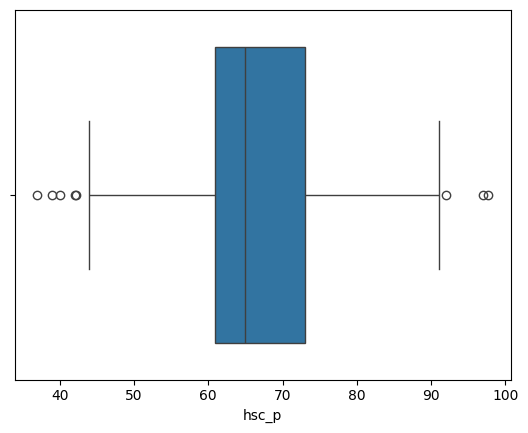

In [10]:
sns.boxplot(x=df['hsc_p'])
plt.show()

In [11]:
sns.histplot(data=df, x='hsc_p')
plt.show()

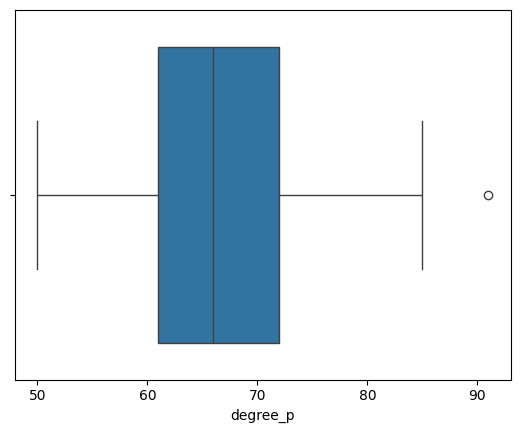

In [12]:
sns.boxplot(x=df['degree_p'])
plt.show()

In [13]:
sns.histplot(data=df, x='degree_p')
plt.show()

In [14]:
sns.boxplot(x=df['etest_p'])
plt.show()

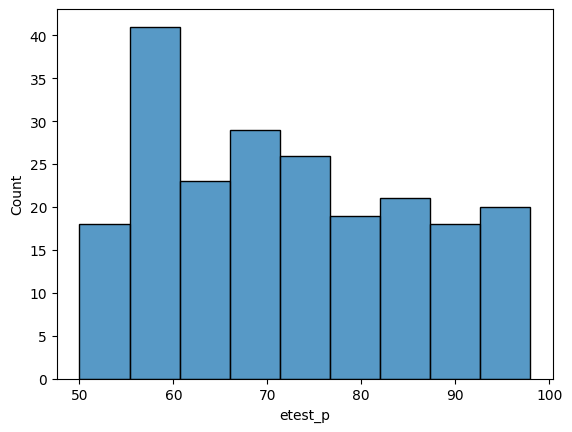

In [15]:
sns.histplot(data=df, x='etest_p')
plt.show()

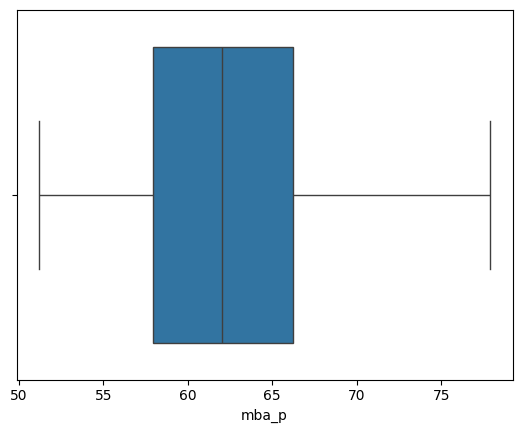

In [16]:
sns.boxplot(x=df['mba_p'])
plt.show()

In [17]:
sns.histplot(data=df, x='mba_p')
plt.show()

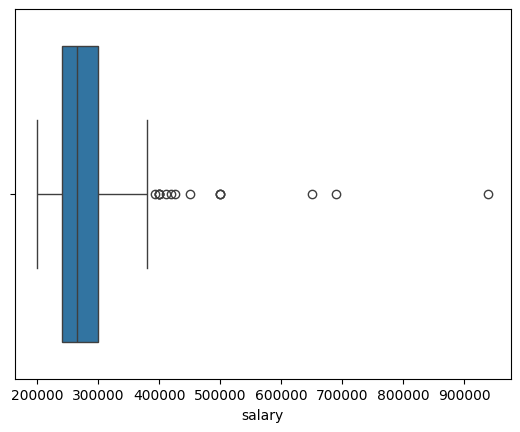

In [18]:
sns.boxplot(x=df['salary'])
plt.show()

In [19]:
sns.histplot(data=df, x='salary')
plt.show()

In [20]:
sns.set_theme(style='whitegrid', palette='muted')
sns.swarmplot(data=df, x='mba_p', y='status', hue='workex')
plt.show()

In [21]:
px.violin(df, y='salary', x='specialisation', color='gender', box=True,
          points='all', width=800, height=600)

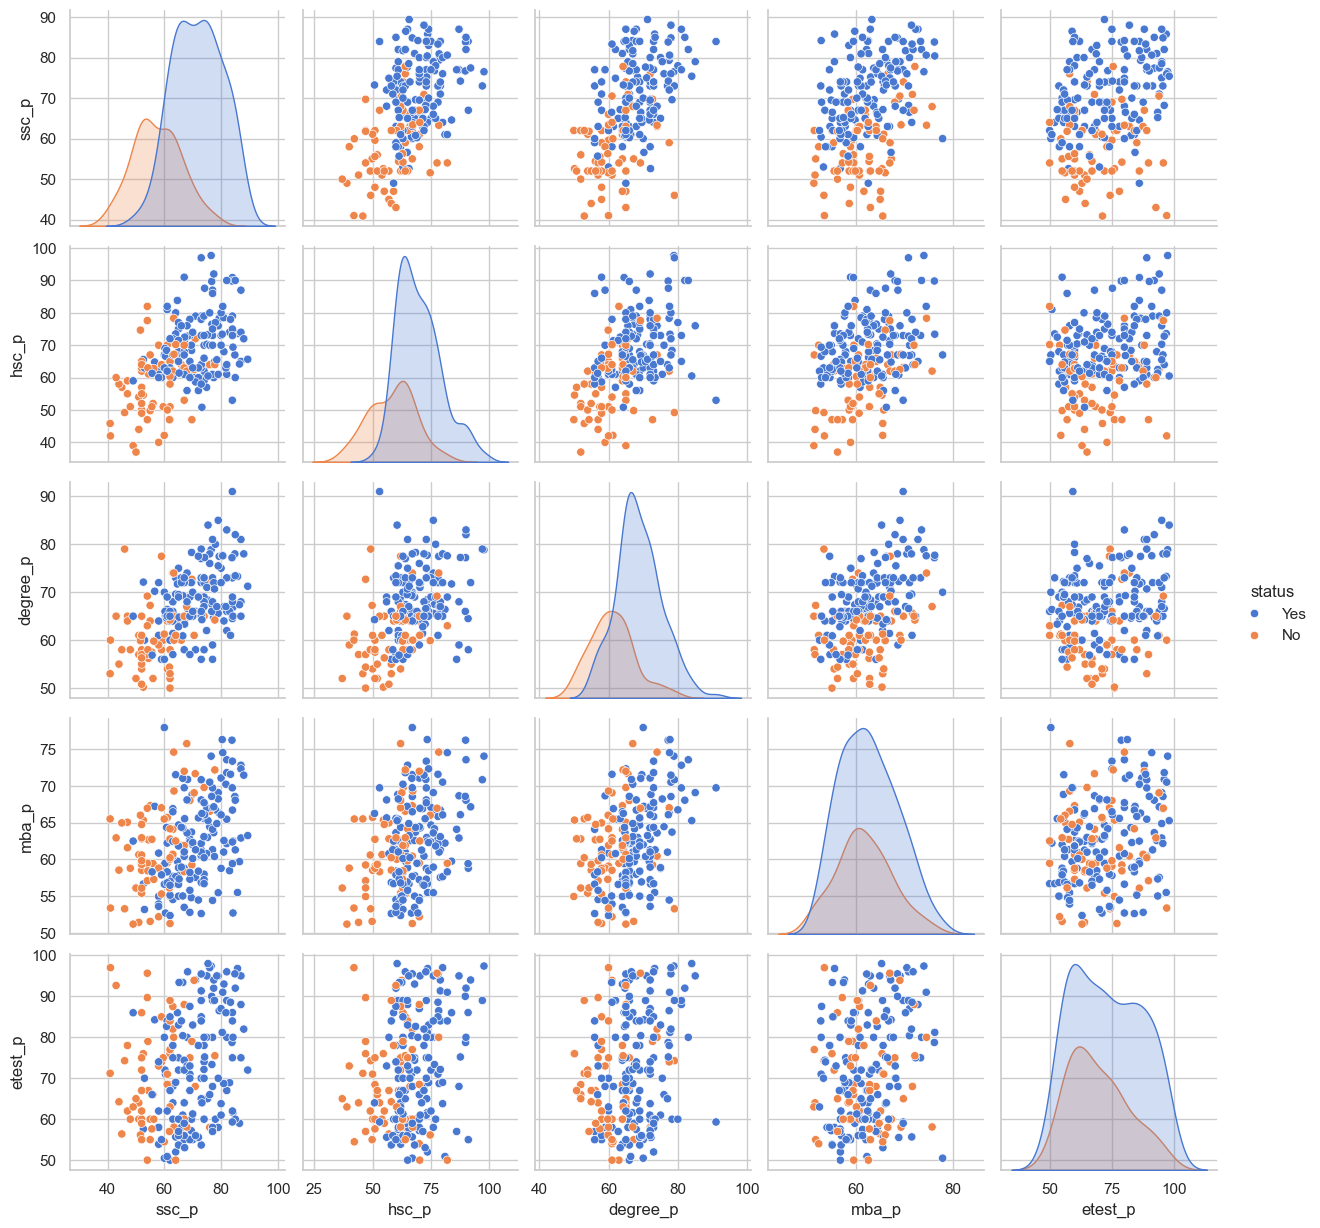

In [22]:
sns.pairplot(df, vars=['ssc_p', 'hsc_p', 'degree_p', 'mba_p', 'etest_p'],
             hue='status')
plt.show()

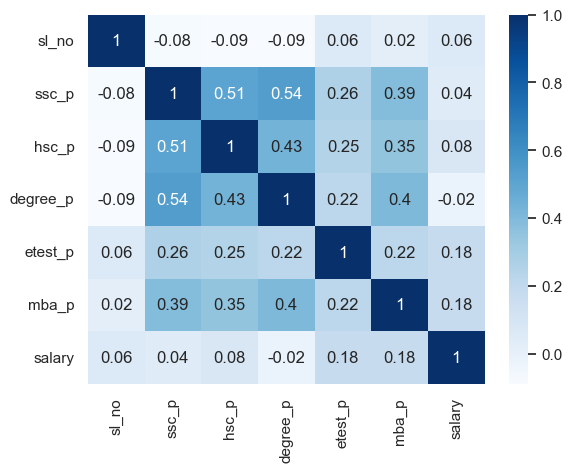

In [23]:
sns.heatmap(data=df.corr(numeric_only=True).round(2), annot=True, cmap='Blues')
plt.show()

In [24]:
categ_feats = ['gender', 'workex', 'specialisation', 'status']

label_enc = LabelEncoder()

for feat in categ_feats:
    df[feat + '_enc'] = label_enc.fit_transform(df[feat])

df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  etest_p specialisation  mba_p status    salary  \
0   Sci&Tech     No     55.0         Mkt&HR  58.80    Yes  270000.0   
1   Sci&Tech    Yes     86.5        Mkt&Fin  66.28    Yes  200000.0   
2  Comm&Mgmt     No     75.0        Mkt&Fin  57.80    Yes  250000.0   
3   Sci&Tech     No     66.0         Mkt&HR  59.43     No       NaN   
4  Comm&Mgmt     No     96.8        Mkt&Fin  55.50    Yes  425000.0   

   gender_enc  workex_enc  specialisation_enc  status_enc  
0           1           0                   1           1  
1           1           1                   0           1  
2           1           0                   0           1  
3           1           0                   1           0  
4           1           0                   0           1

In [25]:
dummy_hsc_s = pd.get_dummies(df['hsc_s'], prefix='dummy')
dummy_degree_t = pd.get_dummies(df['degree_t'], prefix='dummy')

df = pd.concat([df, dummy_hsc_s, dummy_degree_t], axis=1)

df.head()

sl_no gender  ssc_p    ssc_b  hsc_p    hsc_b     hsc_s  degree_p  \
0      1      M  67.00   Others  91.00   Others  Commerce     58.00   
1      2      M  79.33  Central  78.33   Others   Science     77.48   
2      3      M  65.00  Central  68.00  Central      Arts     64.00   
3      4      M  56.00  Central  52.00  Central   Science     52.00   
4      5      M  85.80  Central  73.60  Central  Commerce     73.30   

    degree_t workex  ...  gender_enc workex_enc  specialisation_enc  \
0   Sci&Tech     No  ...           1          0                   1   
1   Sci&Tech    Yes  ...           1          1                   0   
2  Comm&Mgmt     No  ...           1          0                   0   
3   Sci&Tech     No  ...           1          0                   1   
4  Comm&Mgmt     No  ...           1          0                   0   

  status_enc  dummy_Arts  dummy_Commerce  dummy_Science  dummy_Comm&Mgmt  \
0          1       False            True          False            False   
1          1       False           False           True            False   
2          1        True           False          False             True   
3          0       False           False           True            False   
4          1       False            True          False             True   

   dummy_Others  dummy_Sci&Tech  
0         False            True  
1         False            True  
2         False           False  
3         False            True  
4         False           False  

[5 rows x 25 columns]

In [26]:
plt.figure(figsize=(12, 12))
sns.heatmap(data=df.corr(numeric_only=True).round(2), annot=True, cmap='Blues')
plt.show()

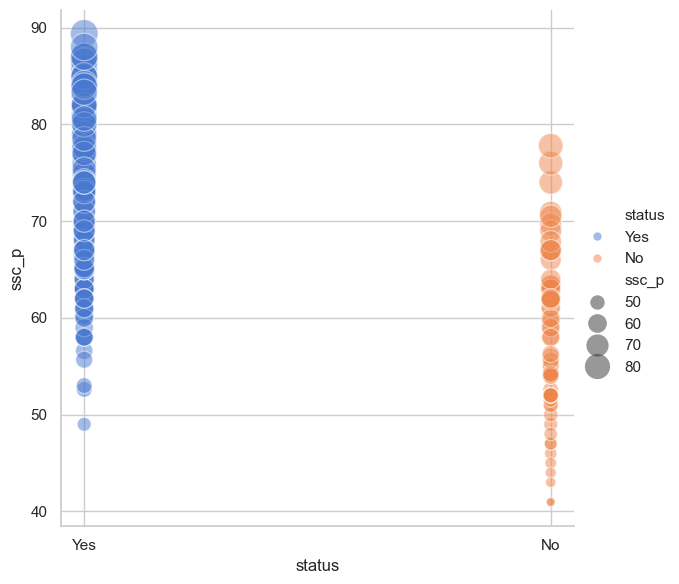

In [27]:
sns.relplot(x='status', y='ssc_p', hue='status', size='ssc_p', sizes=(40, 400),
           alpha=0.5, palette='muted', height=6, data=df)
plt.show()

In [28]:
X = df[['ssc_p', 'hsc_p', 'degree_p', 'workex_enc', 'mba_p']]
y = df['status_enc']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=7)

In [30]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
error = []

for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    error.append(np.mean(y_pred != y_test))

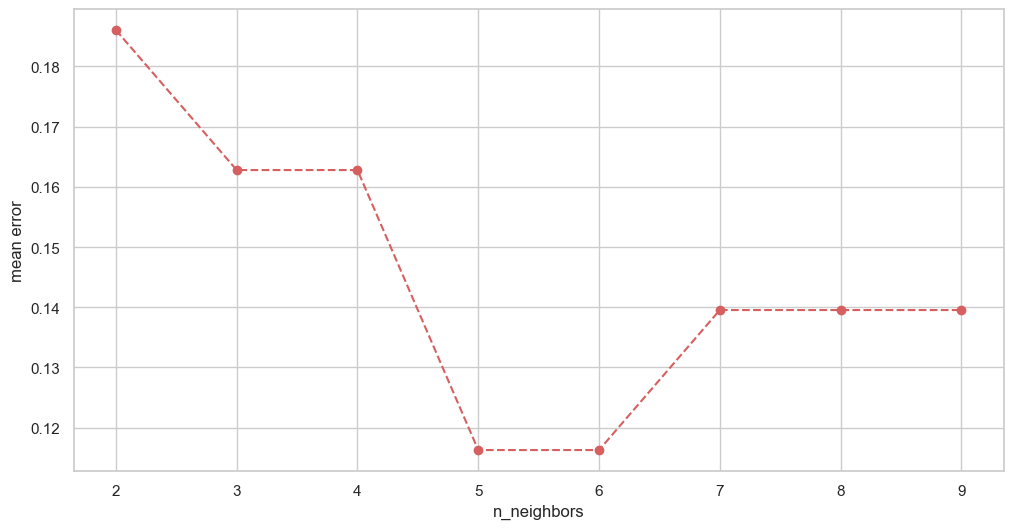

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(2, 10), error, color='r', linestyle='--', marker='o')
plt.ylabel('mean error')
plt.xlabel('n_neighbors')
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)

In [34]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [35]:
y_pred = knn.predict(X_test_scaled)

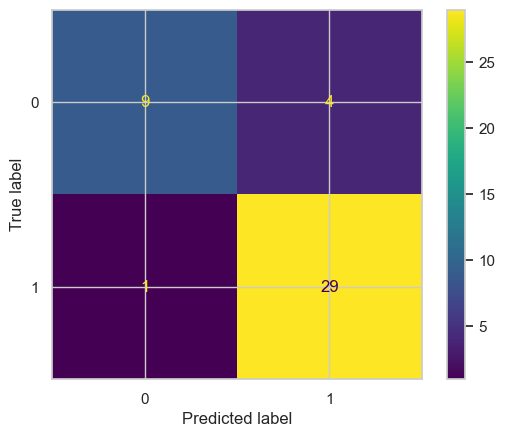

In [36]:
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test, y_pred=y_pred)).plot()
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.88      0.97      0.92        30

    accuracy                           0.88        43
   macro avg       0.89      0.83      0.85        43
weighted avg       0.89      0.88      0.88        43



In [38]:
y_prob = knn.predict_proba(X_test_scaled)[:,1]

In [39]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.8769230769230769


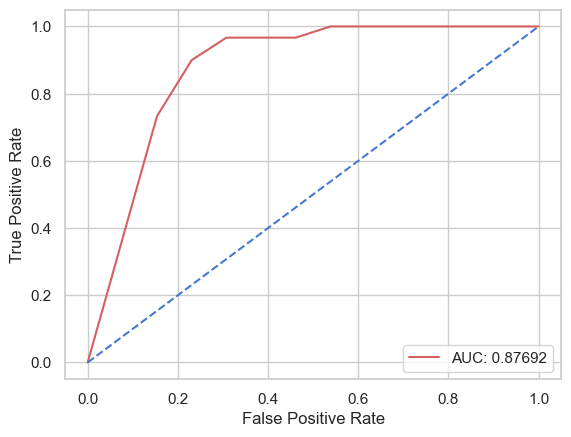

In [40]:
plt.plot(false_positive_rate, true_positive_rate, color='r',
         label=f'AUC: {round(roc_auc, 5)}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()